<a href="https://colab.research.google.com/github/DancesWChickens/CV/blob/main/SupervisedLearning_Classification_INNHotels_FullCode_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

#Data visualization libraries
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import add_constant
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

#libraries for model building and test/train splitting
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.model_selection import GridSearchCV

In [ ]:
# convert ipnb to HTML file
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!jupyter nbconvert Project_SLC_DSBA_INNHotels_FullCode_Final.ipynb --to html

[NbConvertApp] Converting notebook Project_SLC_DSBA_INNHotels_FullCode_Final.ipynb to html
[NbConvertApp] Writing 2928636 bytes to Project_SLC_DSBA_INNHotels_FullCode_Final.html


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the dataset and store as "data"
url='/content/drive/My Drive/UTAustinDataScience/datafiles/INNHotelsGroup.csv'
data = pd.read_csv(url)

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


###Insight

There are 36,275 rows and 19 columns in the dataset. All are set to be non-null. We will need to drop booking ID to reduce noise. Arrival year, month and date are stored as integers and will need to be converted to categorical variables.

There is no duplicate or missing data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

####Setting up functions to create graphs

In [ ]:
#setting up histogram/boxplot function for univariate analysis
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
#Setting up stacked barplot function for bivariate analysis
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=60, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

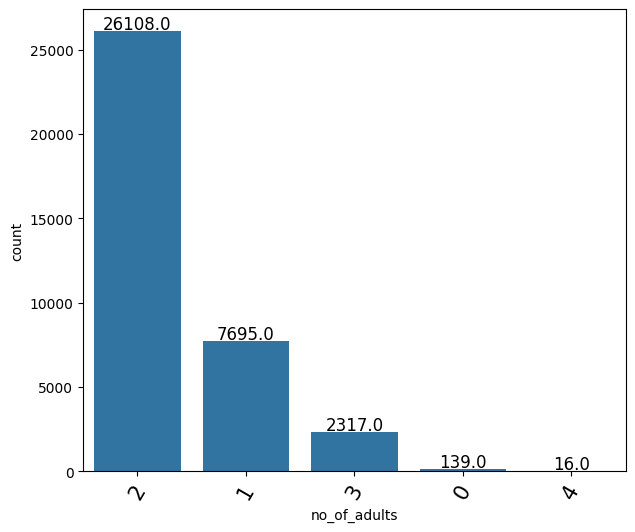

In [ ]:
labeled_barplot(data, "no_of_adults")

####Observations on Number of Adults
The majority of bookings (26,108) have 2 adults. 7695 have 1 adult, 2317 have 3, 139 have 0 and 16 have 4.

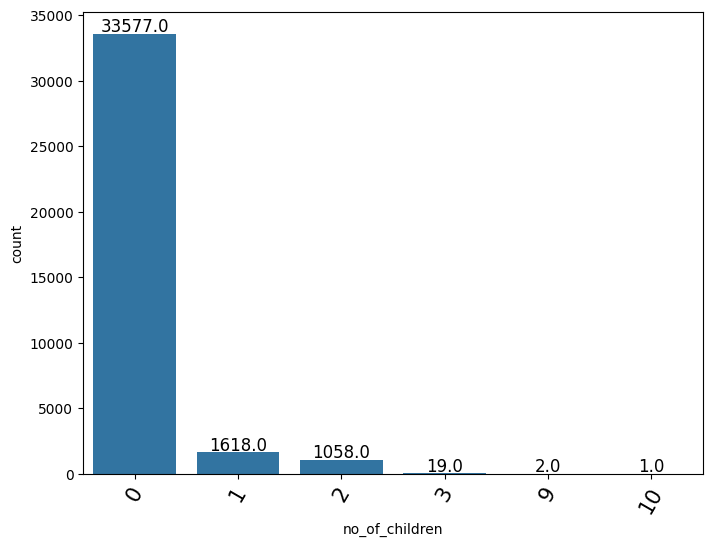

In [ ]:
labeled_barplot(data, "no_of_children")

####Observations on Number of Children
The majority of people do not travel with children and those who do typically have two or less.

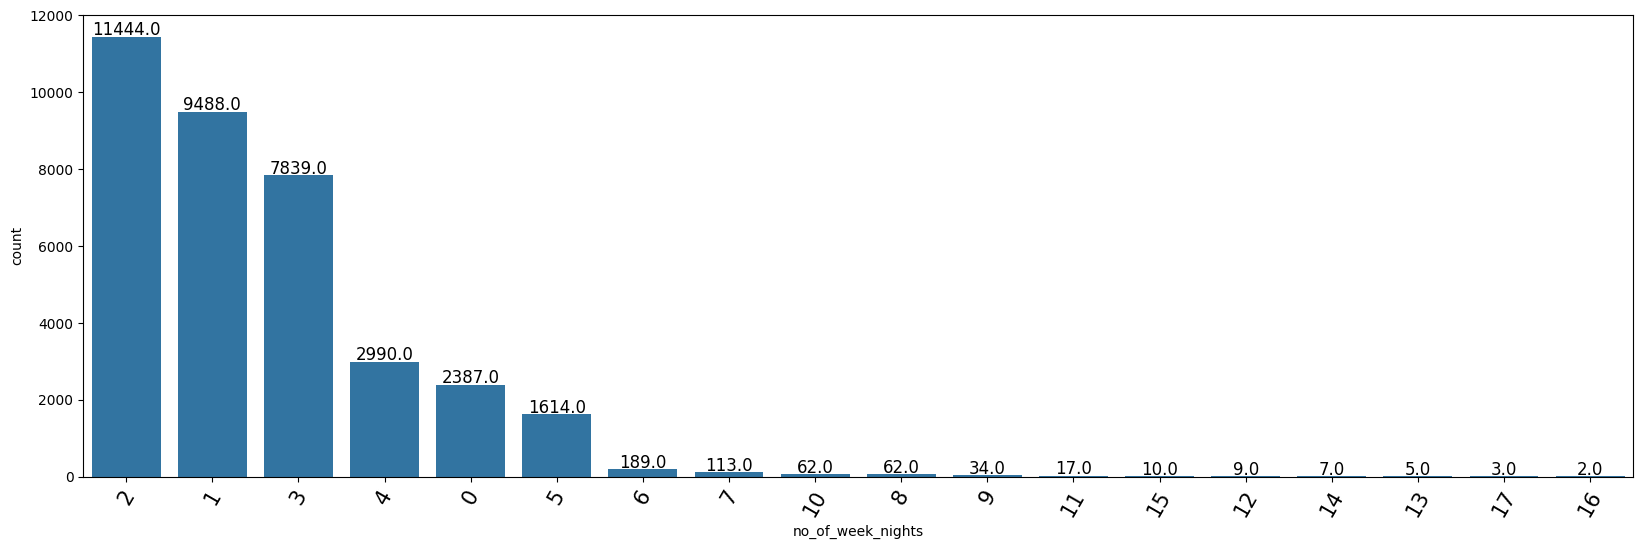

In [ ]:
labeled_barplot(data, "no_of_week_nights")

####Observations on number of week nights
Most people stay 1-3 weeknights. Very few stay more than 4, and even fewer stay more than 6.

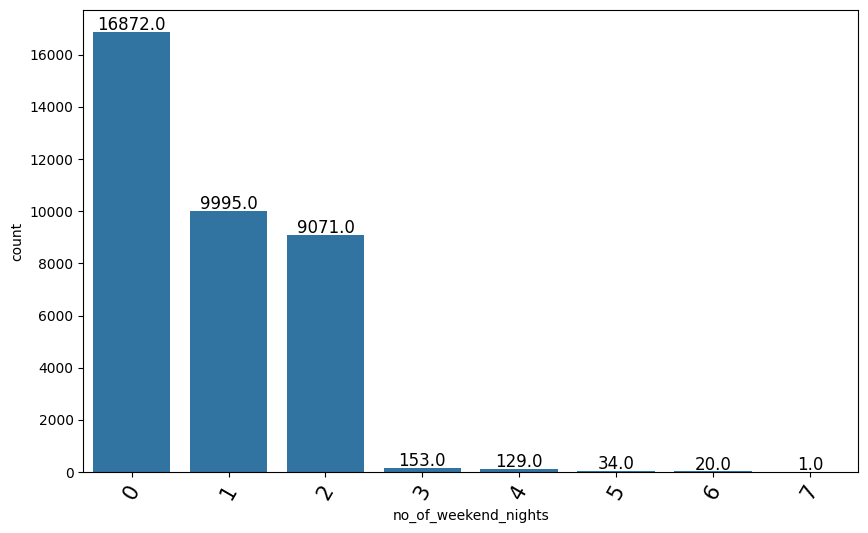

In [ ]:
labeled_barplot(data, "no_of_weekend_nights")

####Observation on No of Weekend Nights
Very few people stay more than 1-2 weekend nights.

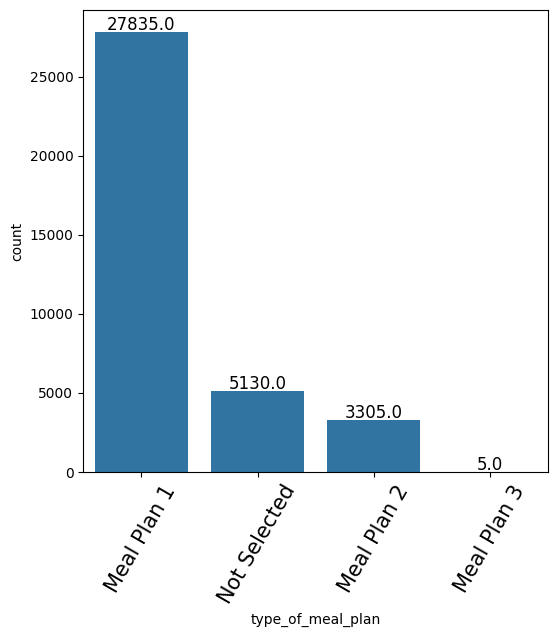

In [ ]:
labeled_barplot(data,"type_of_meal_plan")

####Observations on Meal Plan
People typically choose Meal Plan 1 (Breakfast only) or no meal plan at all. A few select meal plan 2 (breakfast and one other meal), and meal plan 3 (full board) is seldom selected.

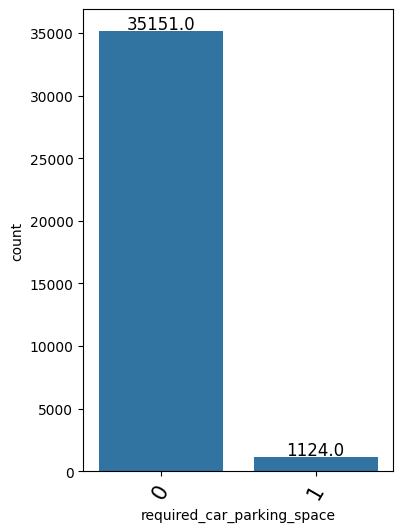

In [ ]:
labeled_barplot(data, "required_car_parking_space")

####Observation on required car parking space
Most people are not traveling with cars.

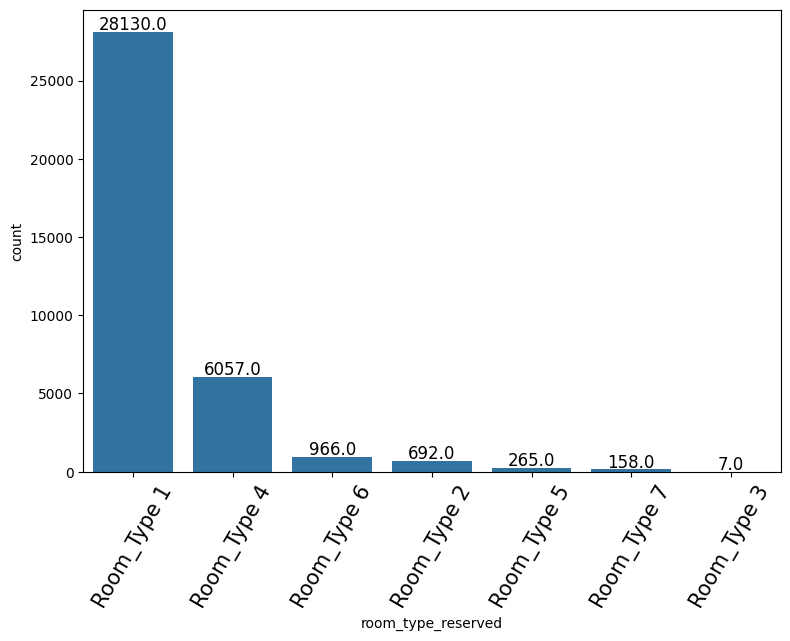

In [ ]:
labeled_barplot(data, "room_type_reserved")

####Observations on Room Type Reserved
The overwhelming choice is Room type 1. Roomt Type 4 is a distant second choice.

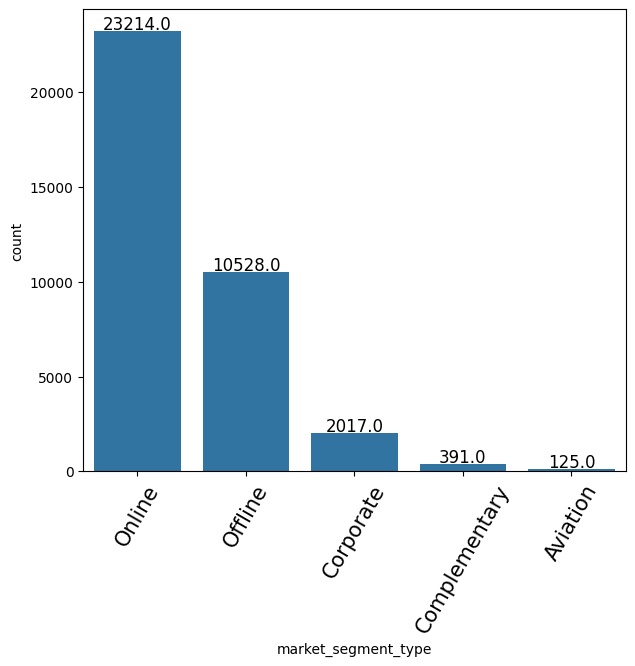

In [ ]:
labeled_barplot(data, "market_segment_type")

####Observations on market segment.
The majority of customers come fromt he online market segment, followed by offline and corporate.

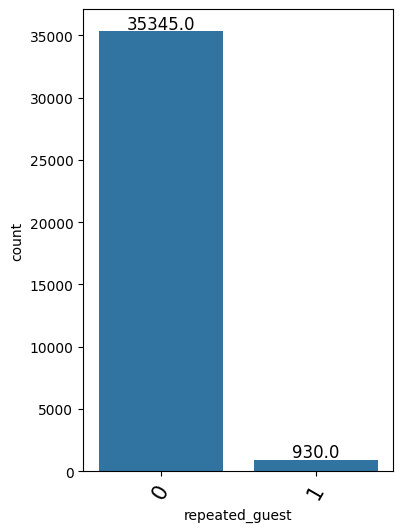

In [ ]:
labeled_barplot(data, "repeated_guest")

####Observations on repeated guests
The majority of bookings are from first time guests.

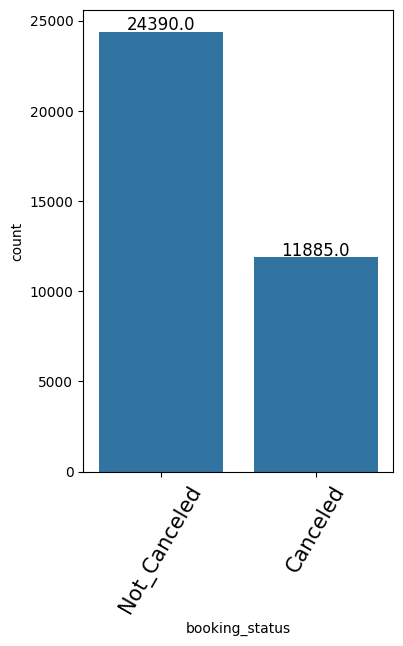

In [ ]:
labeled_barplot(data,"booking_status")

####Observation on booking_status
Roughly 1/3 of bookings get canceled.

no_of_special_requests      0      1     2    3   4  5    All
booking_status                                               
Not_Canceled            11232   8670  3727  675  78  8  24390
All                     19777  11373  4364  675  78  8  36275
Canceled                 8545   2703   637    0   0  0  11885
------------------------------------------------------------------------------------------------------------------------


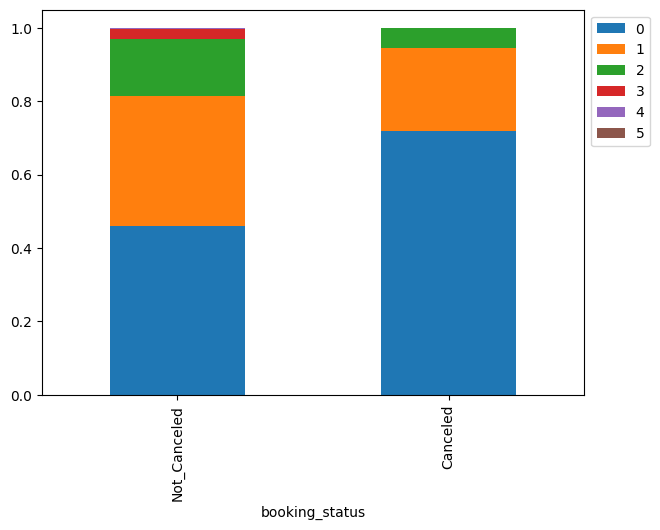

In [ ]:
stacked_barplot(data,"booking_status","no_of_special_requests")

###Insight on special requests
Guests with more special requests are less likely to cancel.

###Bivariate analysis

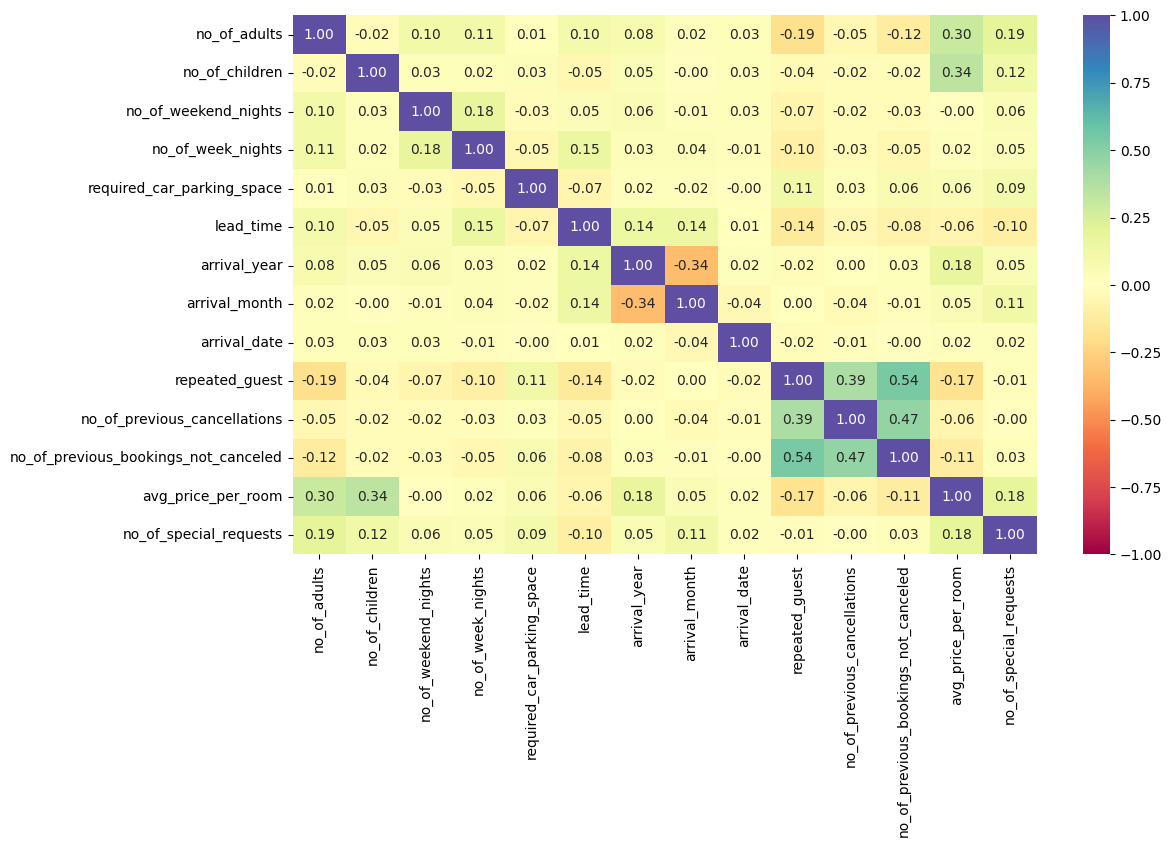

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

####Observations on correlated items

The highest correlations are between repeated guest and no of previous bookings not cancelled. There is also some correlation between no of previous bookings not canceled and no of previous cancellations.

There are lesser correlations between average price per room and booking status, as well as booking status and lead time.

Price per room also has some correlation with number of children and number of adults.

market_segment_type  Aviation  Complementary  Corporate  Offline  Online  \
booking_status                                                             
All                       125            391       2017    10528   23214   
Not_Canceled               88            391       1797     7375   14739   
Canceled                   37              0        220     3153    8475   

market_segment_type    All  
booking_status              
All                  36275  
Not_Canceled         24390  
Canceled             11885  
------------------------------------------------------------------------------------------------------------------------


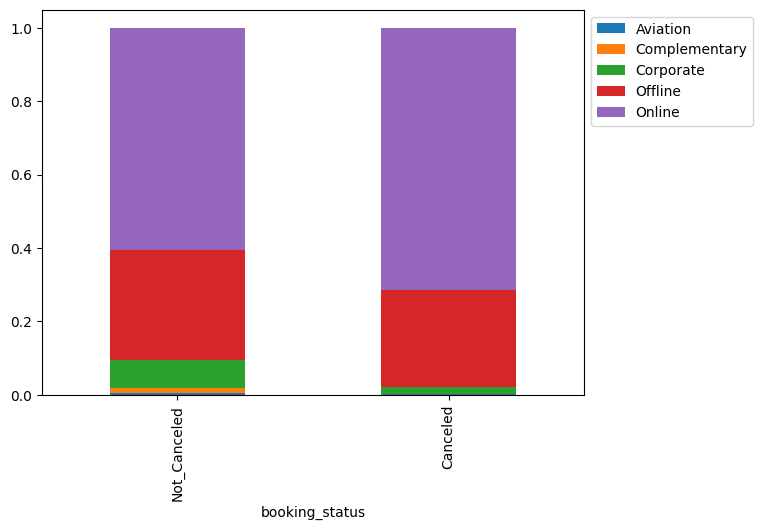

In [ ]:
stacked_barplot(data, "booking_status", "market_segment_type")

####Observation on booking status vs. market segment.

Overall, it looks like online bookings are more likely to cancel than any other segment.

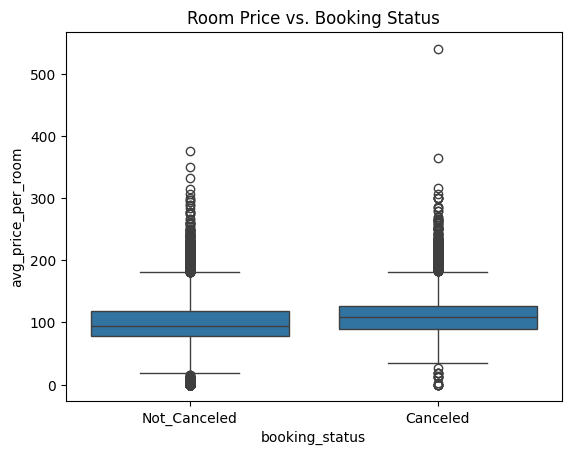

In [ ]:
sns.boxplot(x='booking_status', y='avg_price_per_room', data=data)
plt.title("Room Price vs. Booking Status")
plt.show()

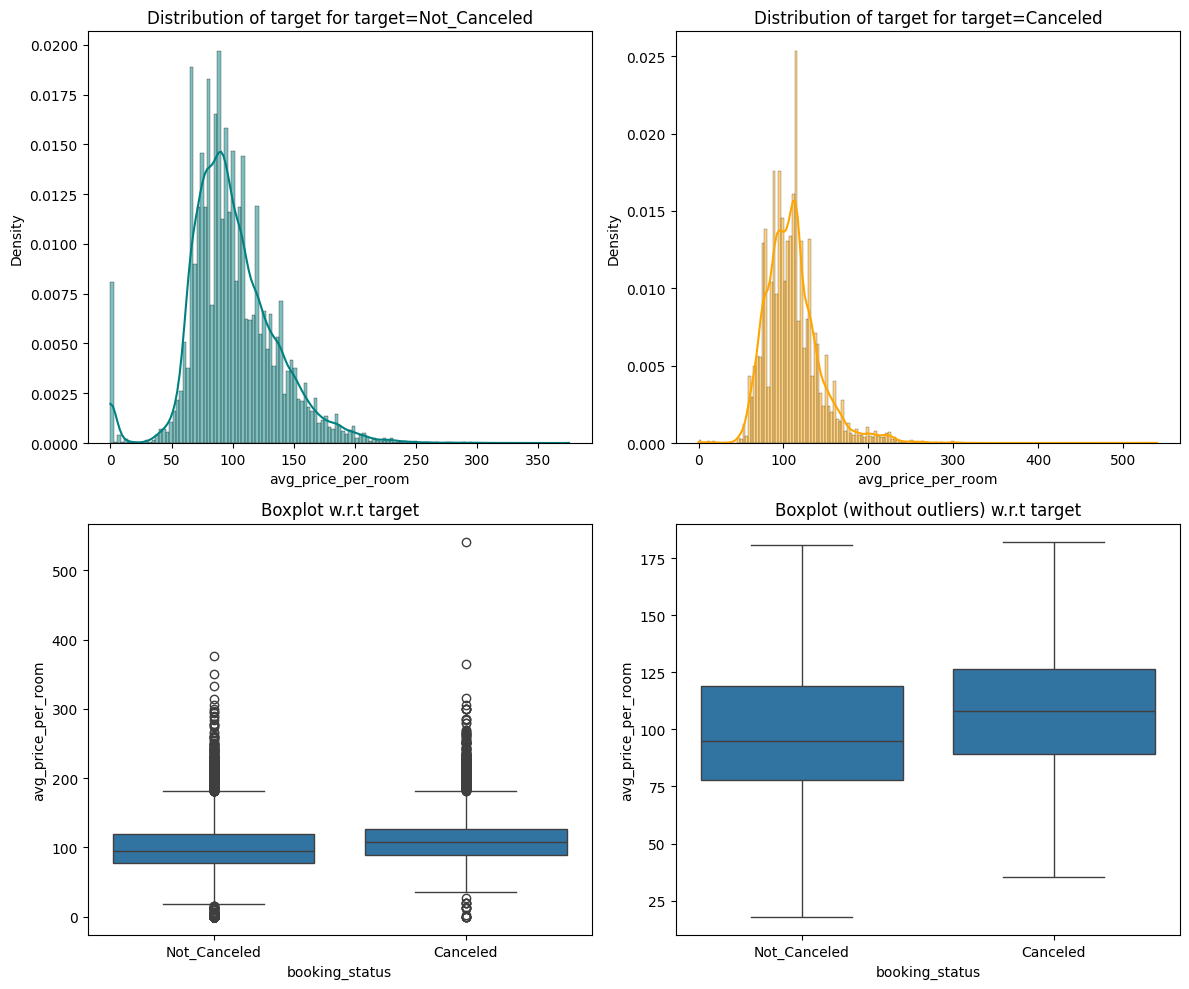

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

####Observation of booking status vs. average price per room.

Overall, the higher the price, the more likely there is to be a cancellation.

### What are the busiest months at the hotel?

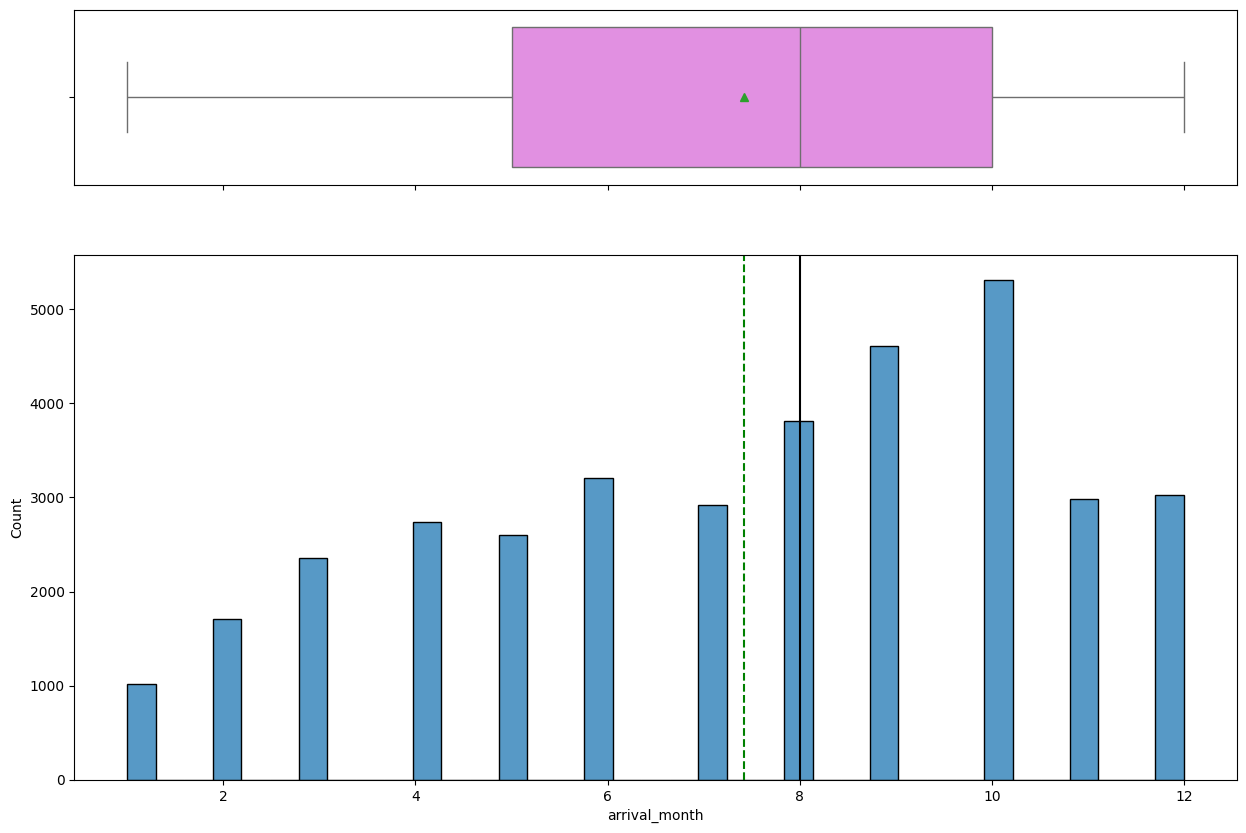

In [ ]:
histogram_boxplot(data, "arrival_month")

####Insight
The businest months are October, September and August, respectively.

###Which market segment do most of the guests come from?

<Axes: xlabel='market_segment_type', ylabel='Count'>

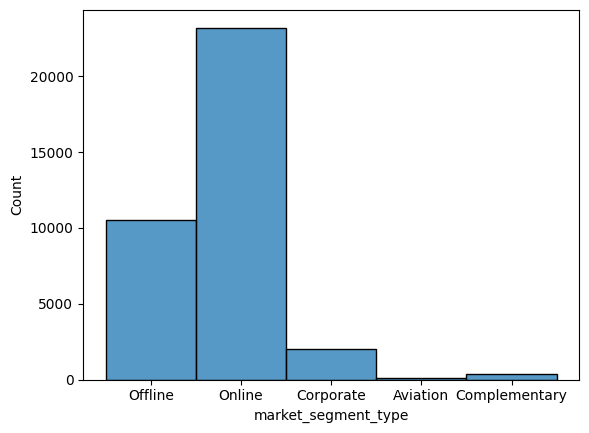

In [ ]:
sns.histplot(data["market_segment_type"])

#### Insight

By far, most guests come from the Online market segment.

###Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

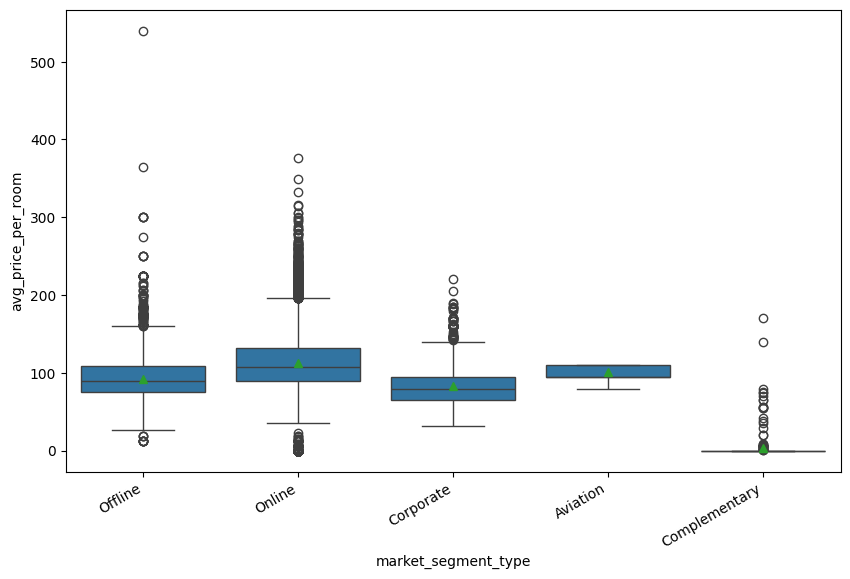

In [ ]:
# Compare room price by market segment

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", showmeans=True
)
plt.xticks(rotation=30, ha="right")
plt.show()


#### Insight:
Online rooms cost more on average, followed by Aviation and Offline segments. Offline and online room prices tend to vary more than others.

###What percentage of bookings are canceled?

In [ ]:
#proportion of canceled to non-canceled bookings
data["booking_status"].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.672364
Canceled,0.327636


####Insight
Approximately 33% of overall bookings are canceled across all segments.

###Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [ ]:
repeat_guest_booking_status = data[data['repeated_guest'] == 1]['booking_status'].value_counts(normalize=True)

print(repeat_guest_booking_status)

booking_status
Not_Canceled    0.982796
Canceled        0.017204
Name: proportion, dtype: float64


####Insight
Only 2% of repeated guests cancel their bookings.

###Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
special_request_booking_status = (
    data[data['no_of_special_requests'] > 0]
    .groupby('no_of_special_requests')['booking_status']
    .value_counts(normalize=True)
    .unstack()
)

print(special_request_booking_status)

booking_status          Canceled  Not_Canceled
no_of_special_requests                        
1                       0.237668      0.762332
2                       0.145967      0.854033
3                            NaN      1.000000
4                            NaN      1.000000
5                            NaN      1.000000


no_of_special_requests      0      1     2    3   4  5    All
booking_status                                               
Not_Canceled            11232   8670  3727  675  78  8  24390
All                     19777  11373  4364  675  78  8  36275
Canceled                 8545   2703   637    0   0  0  11885
------------------------------------------------------------------------------------------------------------------------


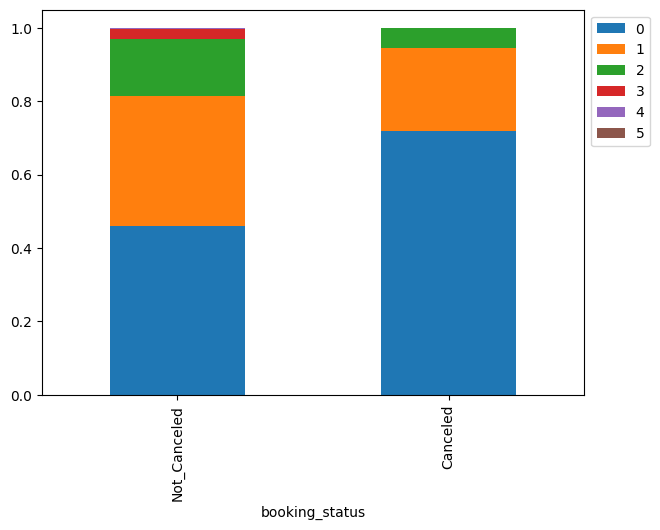

In [ ]:
stacked_barplot(data, "booking_status", "no_of_special_requests")


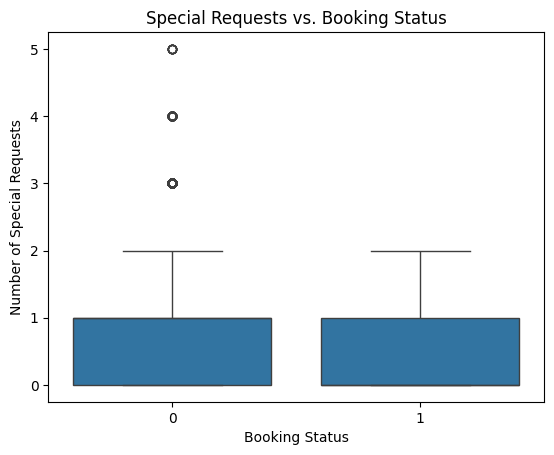

In [ ]:
sns.boxplot(x='booking_status', y='no_of_special_requests', data=data_encoded)
plt.title('Special Requests vs. Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Special Requests')
plt.show()

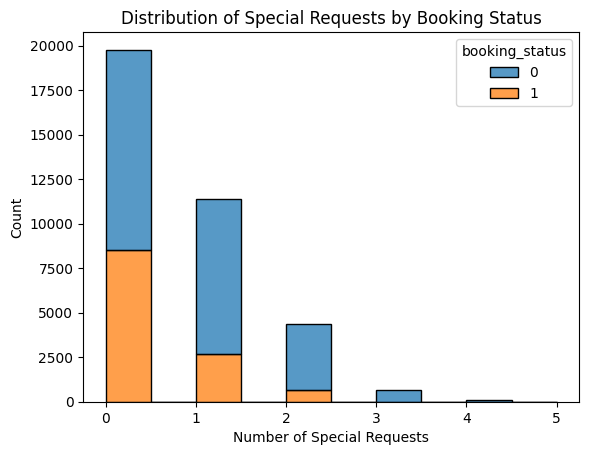

In [ ]:
sns.histplot(data=data_encoded, x='no_of_special_requests', hue='booking_status', multiple='stack', bins=10)
plt.title('Distribution of Special Requests by Booking Status')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.show()

####Insight
Looking at graphs alone, it does not appear that the number of requests makes a huge difference in cancellations, but overall analysis shows that the more special reuqests, the less likely a guest is to cancel.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#This needs to be droped before doing correlation analysis or you encounter an error.
data.drop("Booking_ID", axis=1, inplace=True)

In [ ]:
#convert booking status numerical
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

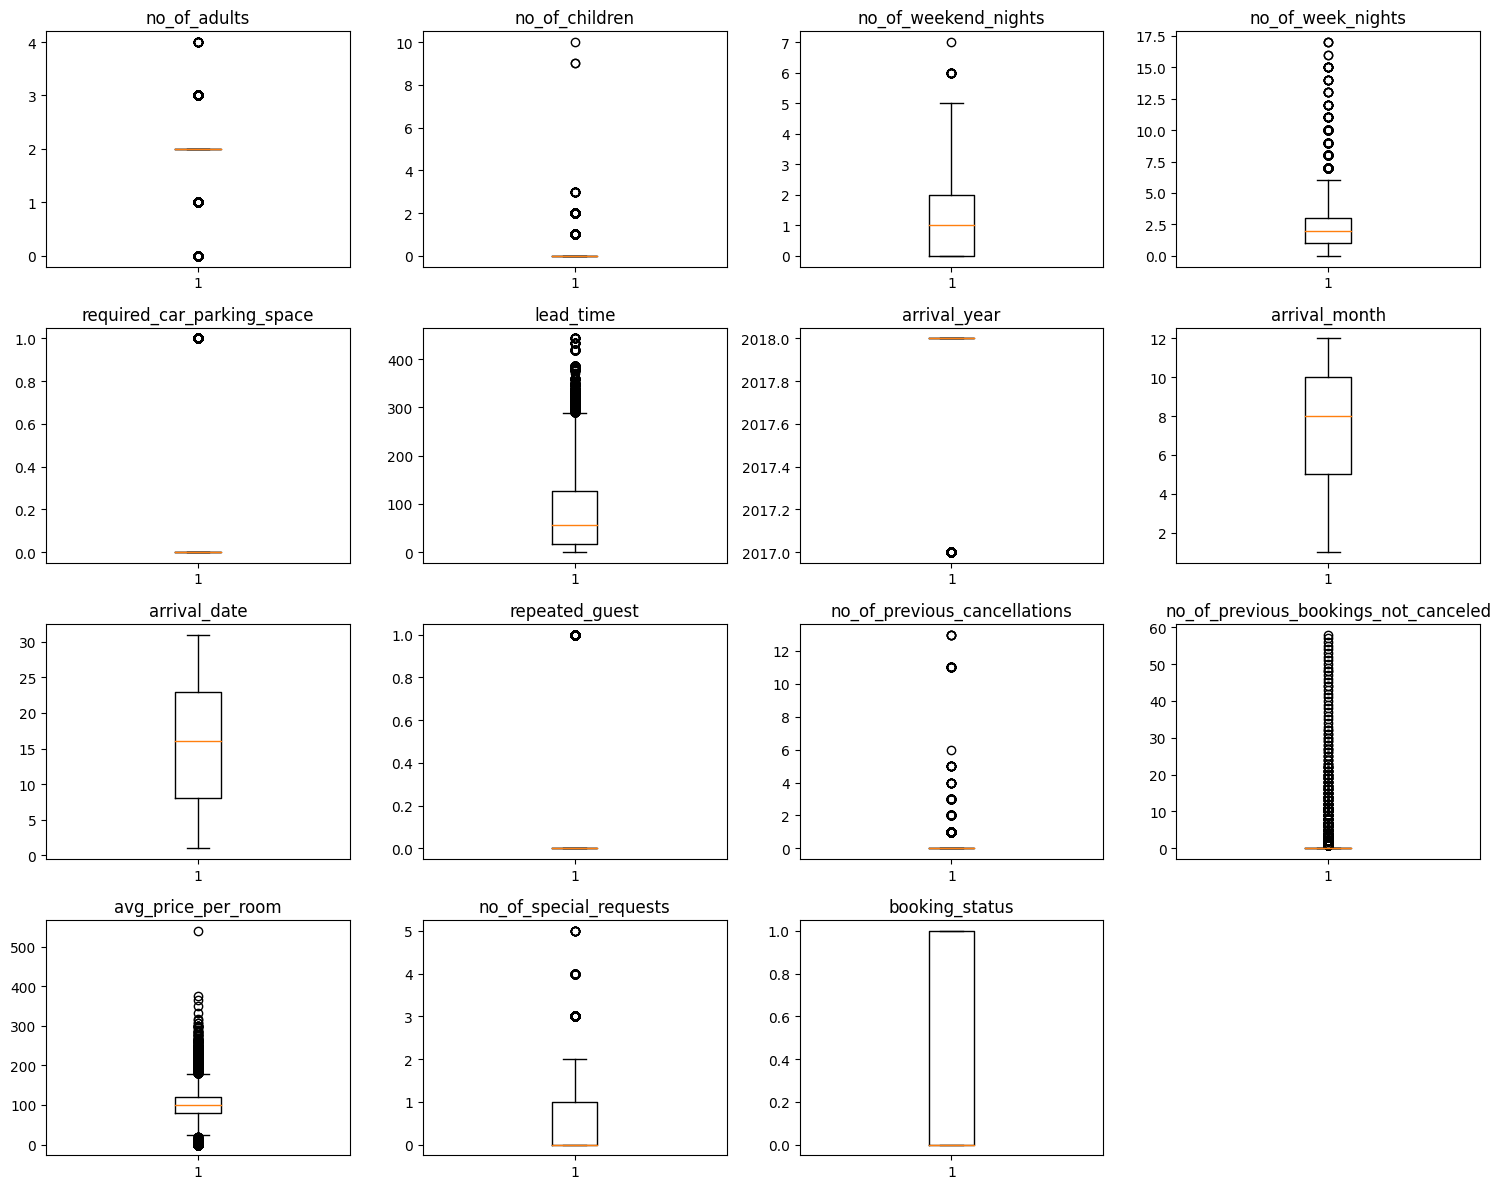

In [ ]:
# outlier detection using boxplots
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

####Observation on outliers.

There are some outliers in price per room (>$500) that will need to be taken care of.

In [ ]:
#There are outliers in price per room. Let's assign the value of the upper whisker to the outlier(s)

# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
data_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,0,False,False,True,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,1,False,False,True,False,False,False,False,False,False,False,False,False,True


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [ ]:
data_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,0,False,False,True,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,1,False,False,True,False,False,False,False,False,False,False,False,False,True


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
#encoding non-numeric columns
data_encoded = pd.get_dummies(data, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [ ]:
# Calculate VIF for each feature
X_vif = data_encoded.drop(columns=['booking_status']).select_dtypes(include=['float', 'int'])  # Drop the target variable and select only numeric columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)
vif_data_sorted

,Feature,VIF
6,arrival_year,29.469287
0,no_of_adults,16.454115
12,avg_price_per_room,12.814049
7,arrival_month,7.158608
8,arrival_date,4.204397
3,no_of_week_nights,3.678968
5,lead_time,2.175020
2,no_of_weekend_nights,1.959966
13,no_of_special_requests,1.797720
11,no_of_previous_bookings_not_canceled,1.603679


Removing features with the highest VIFs.

In [ ]:
data_encoded = data_encoded.drop(columns=['arrival_year','no_of_adults','avg_price_per_room'])

Checking the data again.

In [ ]:
# Calculate VIF for each feature
X_vif = data_encoded.drop(columns=['booking_status']).select_dtypes(include=['float', 'int'])  # Drop the target variable and select only numeric columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)
vif_data_sorted

,Feature,VIF
5,arrival_month,4.394243
2,no_of_week_nights,3.225585
6,arrival_date,3.132375
4,lead_time,2.097017
1,no_of_weekend_nights,1.887979
10,no_of_special_requests,1.696483
9,no_of_previous_bookings_not_canceled,1.599724
7,repeated_guest,1.533247
8,no_of_previous_cancellations,1.334157
0,no_of_children,1.088914


Trial and error showed that the boolean values were going to be a problem in logistic regression, so I am encoding as integer.

In [ ]:
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

## Building a Logistic Regression model

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
#drop the target variable and build the model
X = data_encoded.drop("booking_status", axis=1)
y = data_encoded["booking_status"]
X=sm.add_constant(X)
X=pd.get_dummies(X,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29020, 25)
Shape of test set :  (7255, 25)
Percentage of classes in training set:
booking_status
0    0.671365
1    0.328635
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.676361
1    0.323639
Name: proportion, dtype: float64


In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28995
Method:                           MLE   Df Model:                           24
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.3019
Time:                        00:31:00   Log-Likelihood:                -12829.
converged:                      False   LL-Null:                       -18376.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.8030      0.237     -3.388      0.001      -1.268      -0.338
no_of_children                           0.3286      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Coefficients are very large for market_segment_type_Complementary,type_of_meal_plan_Meal Plan 3. We will need to narrow the model down further.  

###Dropping High P Values

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # Convert all columns to numeric, coercing errors to NaN
    x_train_aux = x_train_aux.apply(pd.to_numeric, errors='coerce').fillna(-999) # Fill NaNs with a placeholde

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_children', 'no_of_weekend_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'market_segment_type_Offline', 'market_segment_type_Online']


After removing high p-values, we were left with these selections:

'no_of_children', 'no_of_weekend_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'market_segment_type_Offline', 'market_segment_type_Online'

In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

logit = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    29005
Method:                           MLE   Df Model:                           14
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.2995
Time:                        00:31:02   Log-Likelihood:                -12872.
converged:                       True   LL-Null:                       -18376.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8711      0.087    -21.564      0.000      -2.041      -1.701
no_of_children                     0.4146      0.039     10.692      0.

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns)

,Odds,Change_odd%
const,0.153951,-84.604937
no_of_children,1.513749,51.374866
no_of_weekend_nights,1.087873,8.787271
required_car_parking_space,0.251795,-74.820512
lead_time,1.015321,1.532108
arrival_month,0.962747,-3.725347
repeated_guest,0.055345,-94.465532
no_of_previous_cancellations,1.209113,20.911336
no_of_special_requests,0.248138,-75.186160
type_of_meal_plan_Meal Plan 2,1.579876,57.987642


####Insight on odds
No of children and no of weekend nights increase the likelihood of the bookings not being canceled.  

Bookings with a car requirement are more likely to be canceled.
The odds of not being canceled increase as lead time increases.

The fact that a person is a repeated guest drastically reduces the odds that a booking will not be canceled.

 For each previous cancellation, the odds of the booking not being canceled increase by 20.91%. This seems odd, but it might suggest that people feel bad about cancelling multiple times.

 Guests with more requests are less likely to cancel.

## Model performance evaluation



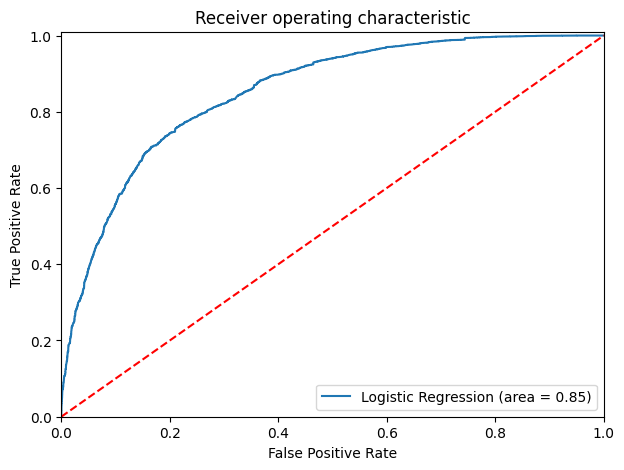

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

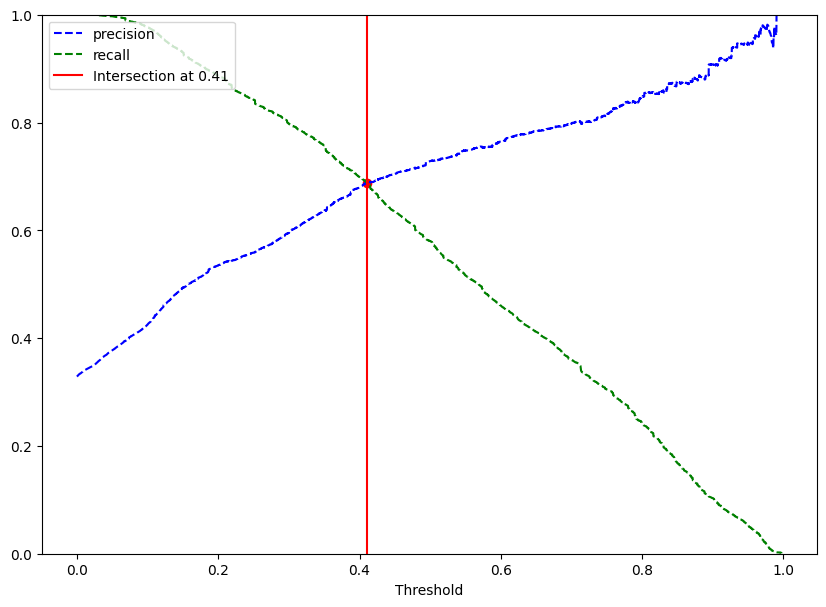

Intersection at Threshold: 0.41, Precision: 0.69, Recall: 0.69


In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")

    # Find the intersection point where precision and recall are closest
    intersection_index = np.argmin(np.abs(precisions[:-1] - recalls[:-1]))
    intersection_threshold = thresholds[intersection_index]

    # Plot the intersection point
    plt.axvline(x=intersection_threshold, color='r', linestyle='-', label=f'Intersection at {intersection_threshold:.2f}')
    plt.scatter(intersection_threshold, precisions[intersection_index], color='red')

    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])



plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()


# Print the intersection details
intersection_index = np.argmin(np.abs(prec[:-1] - rec[:-1]))
intersection_threshold = tre[intersection_index]
print(f"Intersection at Threshold: {intersection_threshold:.2f}, Precision: {prec[intersection_index]:.2f}, Recall: {rec[intersection_index]:.2f}")

In [ ]:
optimal_threshold = 0.41

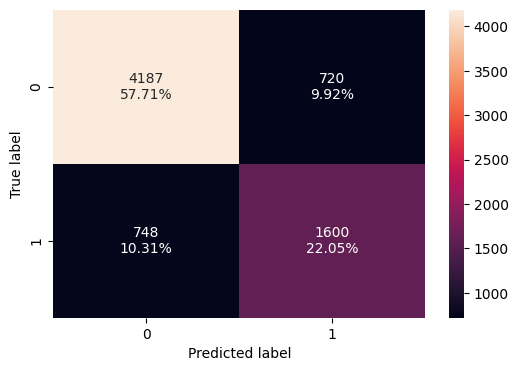

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, optimal_threshold)

#Insight
False negatives and false positives can both be damaging. If we think the customer will arrive and they cancel, that is a monetary loss. If we think the customer will cancel and they actually arrive, that can lead to problems such as overbooking and understaffing.

Therefore, the F1 score will be important.

## Final Model Summary

In [ ]:
# Step 1: Use the model to predict probabilities
y_probs = lg1.predict(X_test1)  # Predict probabilities for the positive class

# Step 2: Apply the optimal threshold of 0.41 to create final predictions
optimal_threshold = 0.41
y_pred_final = (y_probs >= optimal_threshold).astype(int)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print(f"Final Model Evaluation at Threshold {optimal_threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Final Model Evaluation at Threshold 0.41:
Accuracy: 0.7977
Precision: 0.6897
Recall: 0.6814
F1 Score: 0.6855


####Insight on Logistic Regression
The model predicts the booking status correctly 79.77% of the time.

The F1 score of 68.55% indicates a balance between precision and recall when we want to avoid both false positives and false negatives.

## Building a Decision Tree model

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
from sklearn.model_selection import train_test_split

#drop booking status
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

# Convert categorical variables to dummy/one-hot encoded variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
dtree = DecisionTreeClassifier(random_state=1)
# Fitting the model
dtree.fit(X_train, y_train)

# Making predictions
y_pred = dtree.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8711752274189102


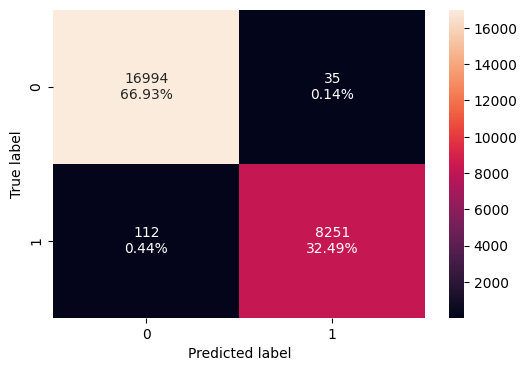

In [ ]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.994211,0.986608,0.995776,0.991171


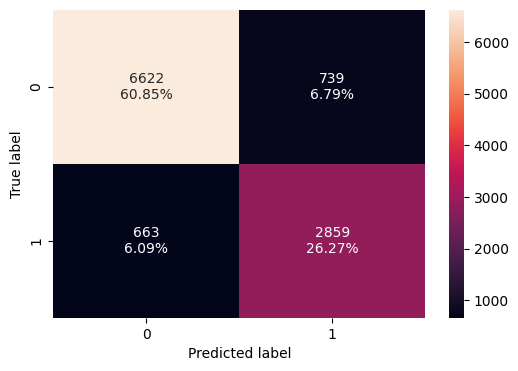

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)



In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dtree, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.871175,0.811755,0.794608,0.80309


## Do we need to prune the tree?

****Insight on Decision Tree Analysis

The extremely high numbers could indicate overfitting that decision trees are prone to. We will definitely want to consider pruning the tree.

In [ ]:
feature_importances = dtree.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                                 Feature  Importance
5                              lead_time    0.351362
12                    avg_price_per_room    0.174192
26            market_segment_type_Online    0.092345
8                           arrival_date    0.085079
13                no_of_special_requests    0.068207
7                          arrival_month    0.066284
3                      no_of_week_nights    0.044726
2                   no_of_weekend_nights    0.040146
0                           no_of_adults    0.026784
6                           arrival_year    0.011729
16        type_of_meal_plan_Not Selected    0.007910
4             required_car_parking_space    0.006926
19        room_type_reserved_Room_Type 4    0.006506
25           market_segment_type_Offline    0.003884
14         type_of_meal_plan_Meal Plan 2    0.003840
1                         no_of_children    0.003567
17        room_type_reserved_Room_Type 2    0.002133
20        room_type_reserved_Room_Type 5    0.

####Pre-pruning the tree according to the output of the function to find the best algorithm.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

In [ ]:
dtree2 = DecisionTreeClassifier(
    max_depth=6, max_leaf_nodes=50, min_samples_split=10, random_state=1
)
dtree2.fit(X_train, y_train)

# Making predictions
y_pred2 = dtree2.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8432417531930534


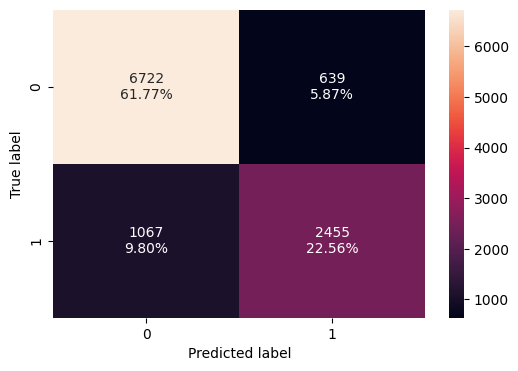

In [ ]:
confusion_matrix_sklearn(dtree2, X_test, y_test)

In [ ]:
decision_tree2_perf_test = model_performance_classification_sklearn(
    dtree2, X_test, y_test
)
decision_tree2_perf_test

,Accuracy,Recall,Precision,F1
0,0.843242,0.697047,0.793471,0.74214


###Visualizing the tree

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


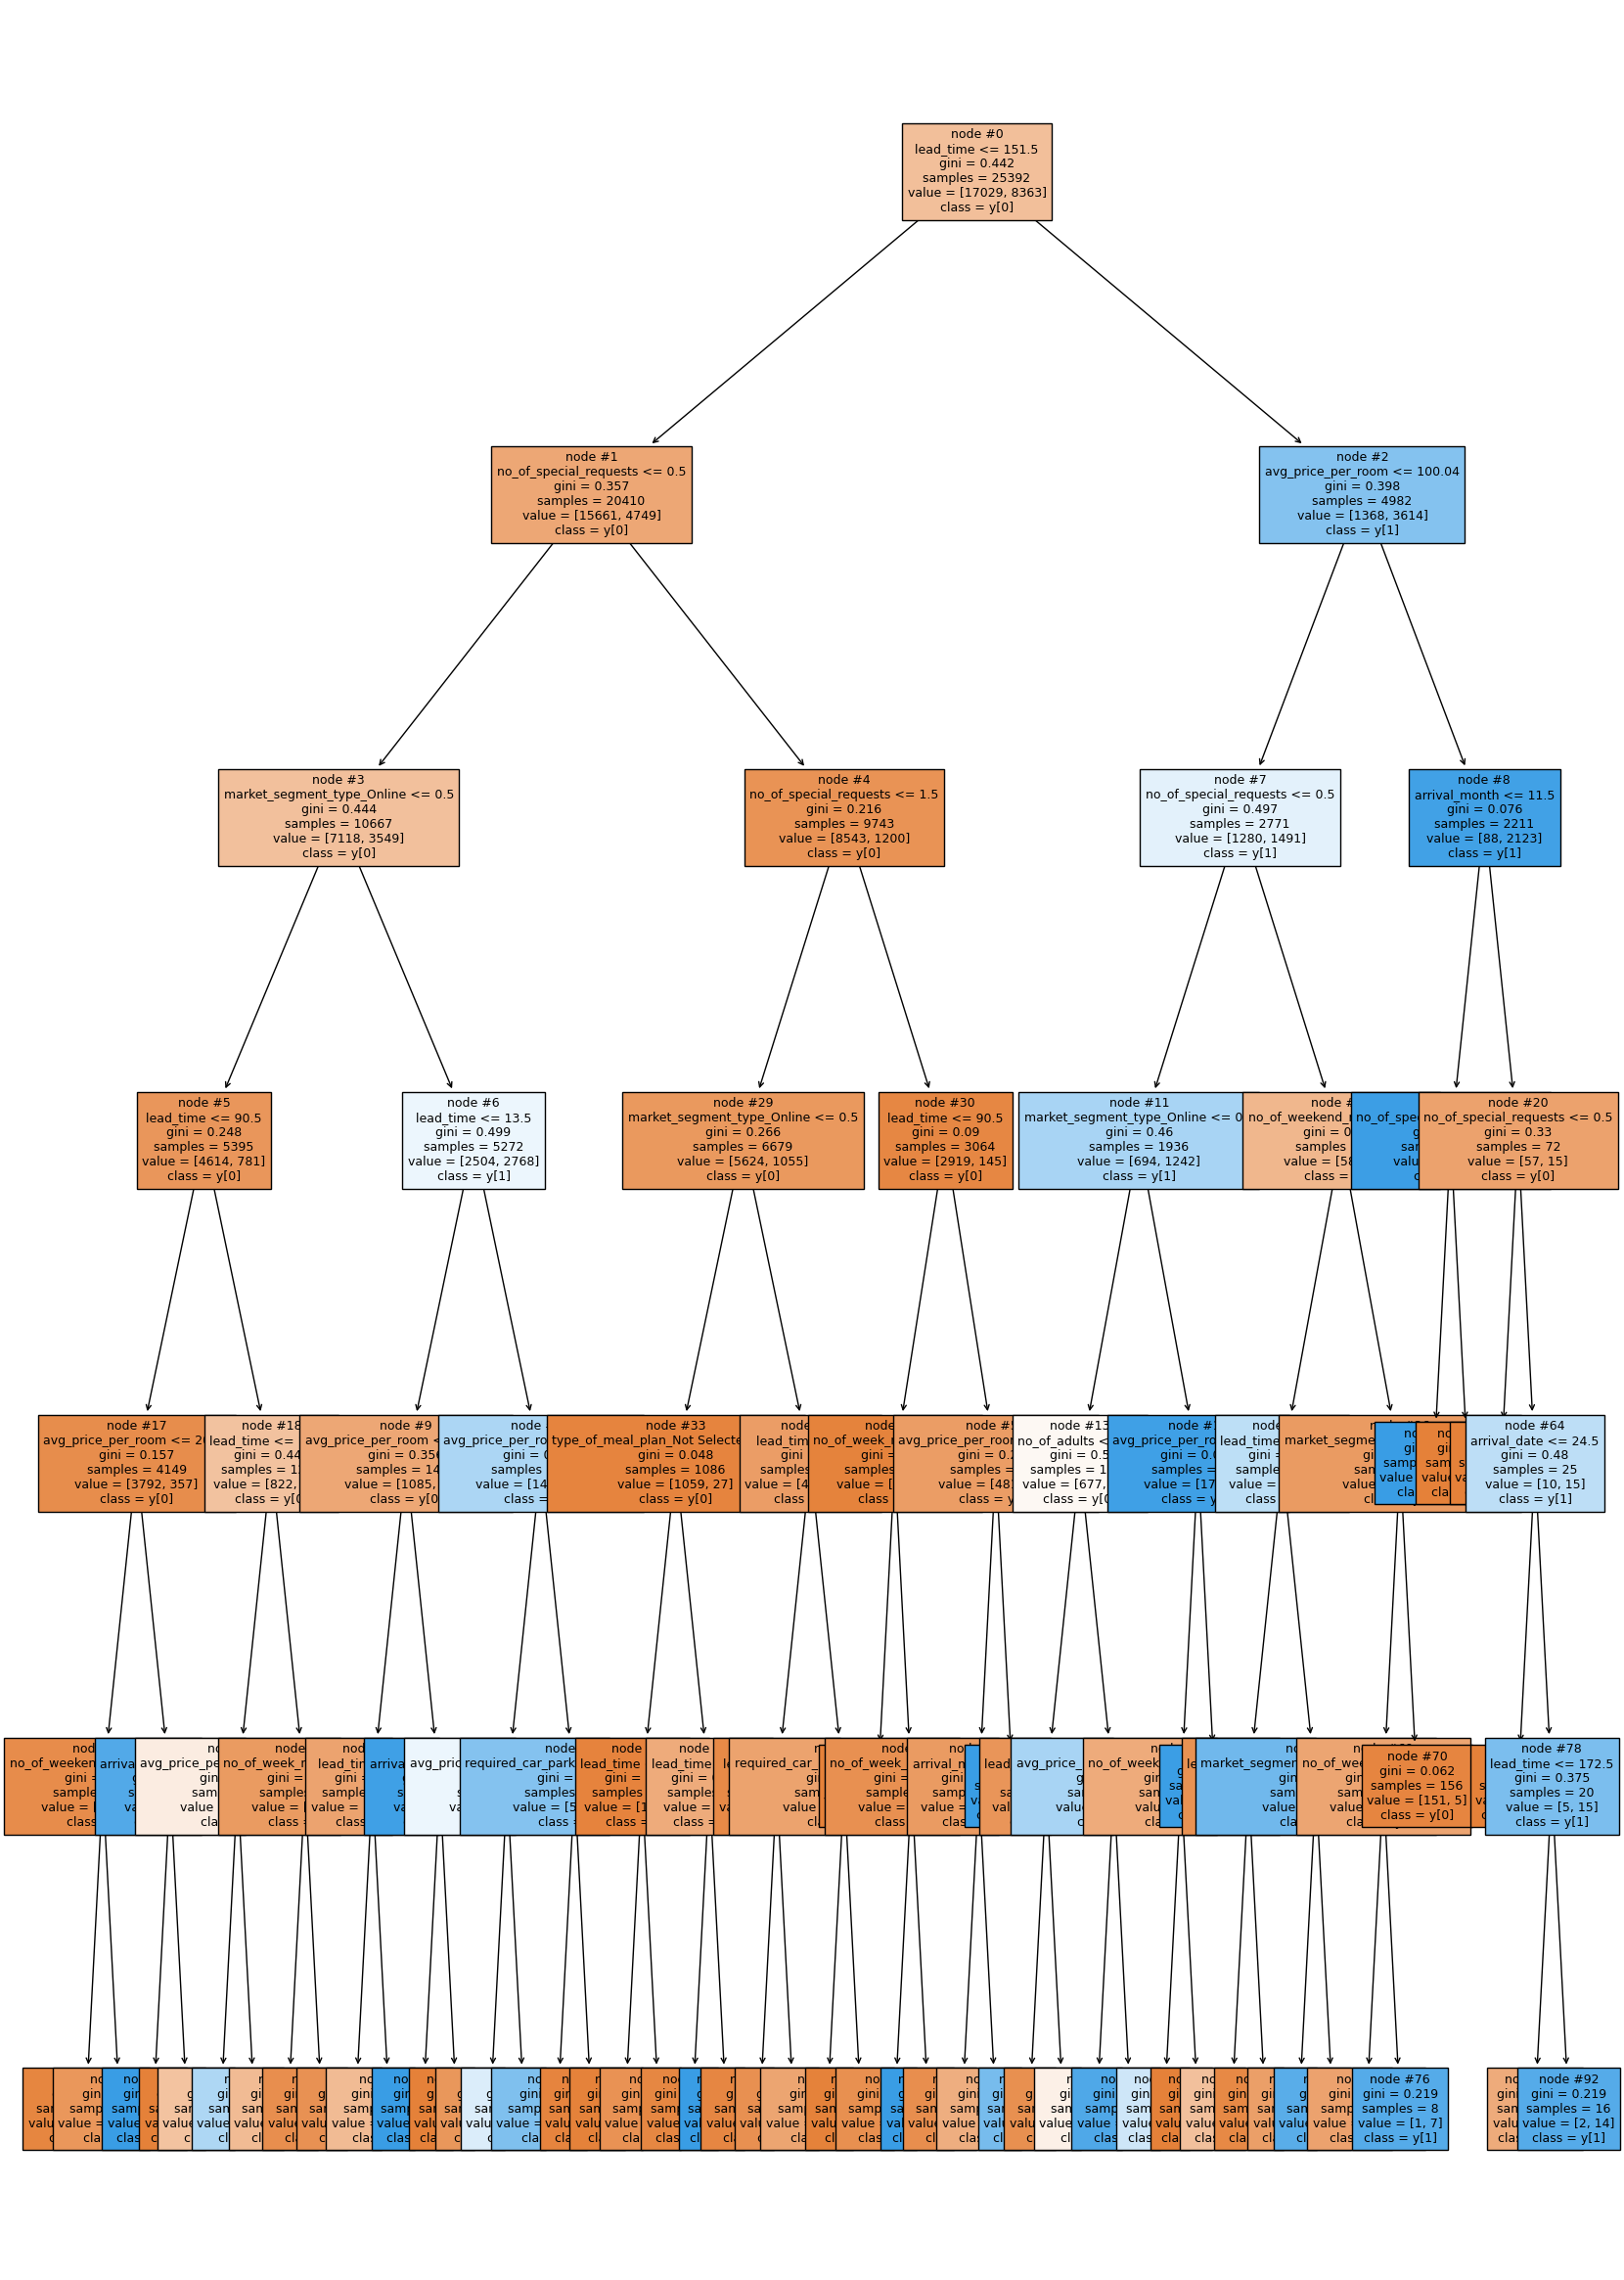

In [ ]:
from sklearn import tree
feature_names = list(X.columns)
print(feature_names)
plt.figure(figsize=(20,30))
tree.plot_tree(dtree2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

## Model Performance Comparison and Conclusions

In [ ]:

tree = dtree2.tree_

# Get Gini impurity values for each node
gini_impurities = tree.impurity

# Optionally, you can print these values or examine a few of them
print("Gini Impurities at Each Node in the Tree:")
print(gini_impurities)


Gini Impurities at Each Node in the Tree:
[0.44176105 0.3570801  0.39837933 0.44402701 0.21599129 0.2476143
 0.4987462  0.49710091 0.07643375 0.35649156 0.46499969 0.45993913
 0.41855642 0.49953666 0.05316839 0.2403763  0.46070104 0.15728223
 0.44898474 0.02856543 0.32986111 0.49792267 0.18307796 0.4987542
 0.39922632 0.48032258 0.28452844 0.         0.         0.26601424
 0.09016844 0.49657473 0.28082337 0.04848753 0.30003661 0.20761246
 0.34081333 0.38650991 0.04875    0.12220662 0.33449927 0.33697122
 0.05876951 0.25048397 0.49508328 0.45036592 0.46684042 0.20397146
 0.43145288 0.03022359 0.29771739 0.15146532 0.19753086 0.07016635
 0.25163966 0.375      0.0163655  0.36281179 0.1894384  0.30839002
 0.23970518 0.34430613 0.01098868 0.         0.48       0.43213296
 0.17142257 0.28498553 0.         0.34567901 0.06204799 0.17184746
 0.38875044 0.         0.19356735 0.33169055 0.21875    0.
 0.375      0.         0.         0.18549346 0.         0.03709249
 0.375      0.08677686 0.     

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_perf_test.T,
        decision_tree2_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.994211,0.871175,0.843242
Recall,0.986608,0.811755,0.697047
Precision,0.995776,0.794608,0.793471
F1,0.991171,0.803090,0.742140


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

The hotel should focus on attracting repeat customers as they are far less likely to cancel. This could include loyalty programs and special deals for customers who have been there before.

For bookings far in advance, extra effort may be made to remind people of their upcoming stays - i.e, email and text confirmations, notices of special deals, etc. They may also want to offer incentives for non-cancelable bookings.

If a customer needs parking space or special accommodations, they are less likely to cancel, so the hotel should look at its parking offerings and services geared towards special needs and personalized service.

To level out bookings throughout the year, special deals may be offered during the off-season to incentivize bookings outside of the busiest months.

